In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
%matplotlib inline

In [2]:
def plot_data(X, y, feature_names, resolution=0.02):
    axis_max = abs(x).max().round() + 1
    plt.figure(figsize=(10, 10))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')
    plt.xlim(-axis_max, axis_max)
    plt.ylim(-axis_max, axis_max)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Data')

def plot_decision_boundaries(X, y, clf, feature_names, resolution=0.02):
    # Plot the decision surface
    axis_max = abs(x).max().round() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(-axis_max, axis_max, resolution),
                           np.arange(-axis_max, axis_max, resolution))
    Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
    plt.figure(figsize=(10, 10))
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    
    # Plot class sample
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')
    
    plt.xlim(-axis_max, axis_max)
    plt.ylim(-axis_max, axis_max)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(clf.__class__.__name__)

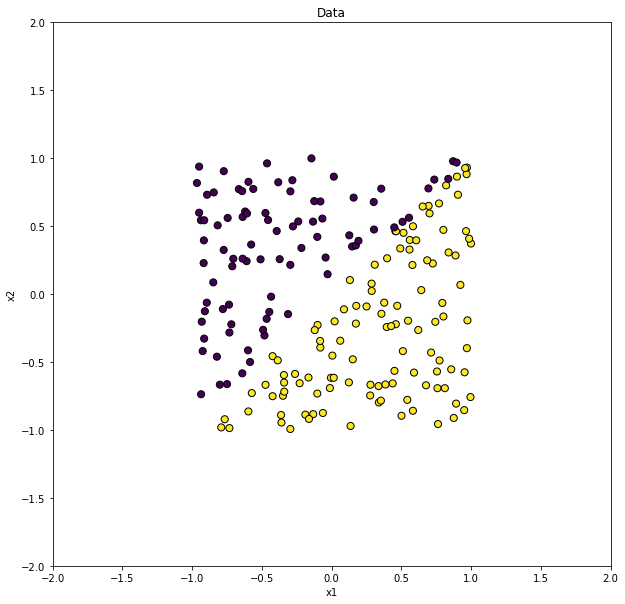

In [3]:
def get_2d(n_samples):
    x = np.random.rand(2*n_samples, 2) * 2 - 1
    y = (x[:,0]>x[:, 1]).astype(int)
    return x, y

n_samples = 100
x, y = get_2d(n_samples)
plot_data(x, y, ['x1','x2'])

# Train - Test

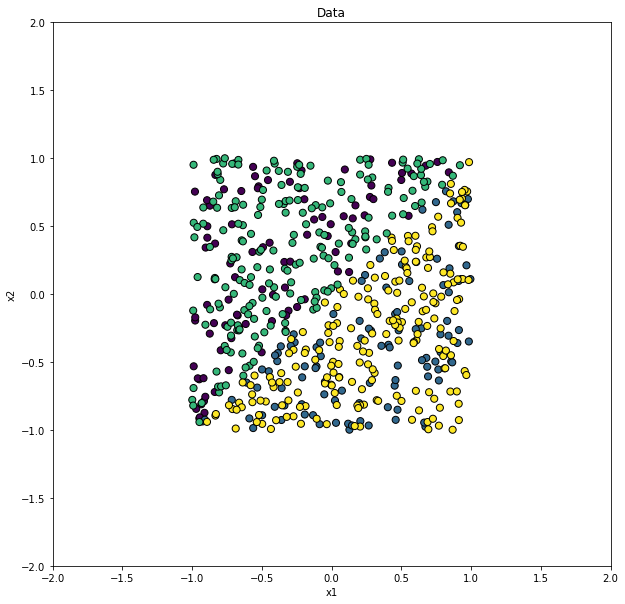

In [4]:
n_train = 500
n_test = 200

x_train, y_train = get_2d(n_samples)
x_test, y_test = get_2d(n_test)
y = np.concatenate([y_train, y_test+2])
x = np.concatenate([x_train, x_test])
plot_data(x, y, ['x1','x2'])

### Decision Tree

Tree: Train accuracy=0.99, Test accuracy=0.94


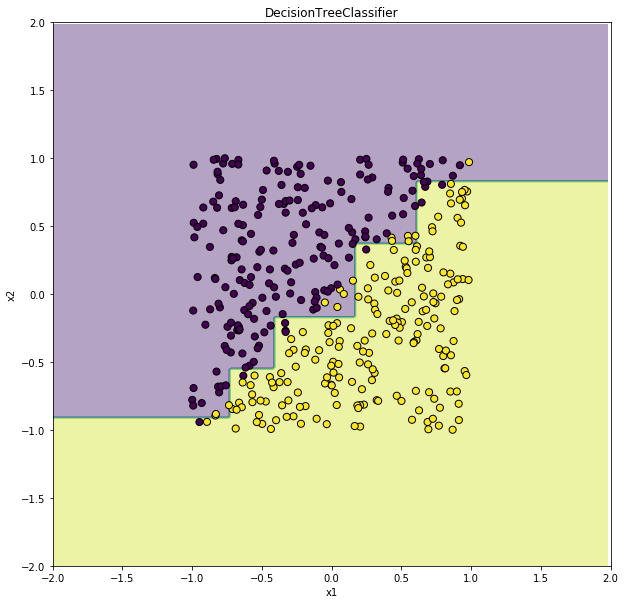

In [5]:
classifier = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=3)
classifier.fit(x_train, y_train)
plot_decision_boundaries(x_test, y_test, classifier, ['x1','x2'])
print('Tree: Train accuracy={0}, Test accuracy={1}'.format(
    classifier.score(x_train, y_train), classifier.score(x_test, y_test)))

### Random Forest

Random Forest: Train accuracy=0.98, Test accuracy=0.9225


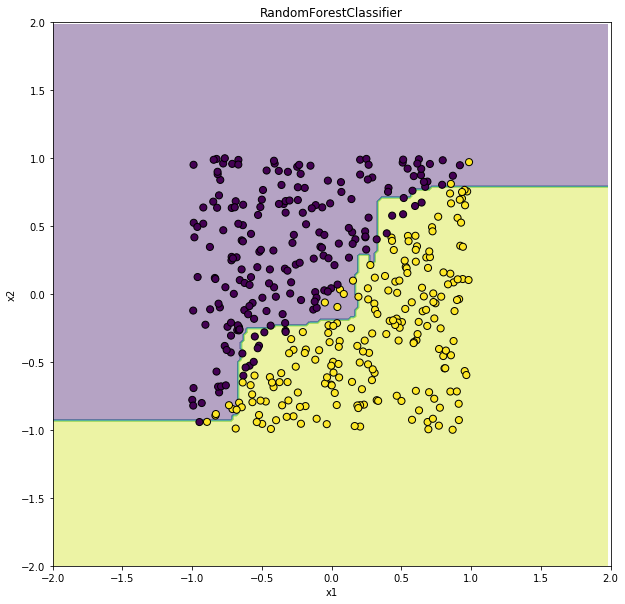

In [6]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=3)
classifier.fit(x_train, y_train)
plot_decision_boundaries(x_test, y_test, classifier, ['x1','x2'])
print('Random Forest: Train accuracy={0}, Test accuracy={1}'.format(
    classifier.score(x_train, y_train), classifier.score(x_test, y_test)))

# The impact of the number of trees
![RandomForest](https://miro.medium.com/max/675/1*EFBVZvHEIoMdYHjvAZg8Zg.gif "random forest")